# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Для повторяемости экспериментов, чтобы при всех перезапусках у нас получались одинаковые ответы`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [3]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


`mileage`, `engine`, `max_power`, `torque`, `seats` - имеют пропуски, которые ищет info

Отсмотром уникальных значений других пропусков не найдено

In [5]:
df_train.duplicated().sum()

np.int64(985)

In [6]:
len(df_train[df_train.duplicated()].drop_duplicates())

493

почти тысяча дубликатов!

и из них 493 уникальных дубликатов

In [7]:
from ydata_profiling import ProfileReport

In [8]:
ProfileReport(df_train, title="Profiling Report").to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 158.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ну достаточно логичные корреляции:
- чем мощнее машина, тем она дороже
- чем мощнее машина, тем больше топлива она потребряет
- чем младше машина, тем меньше пробег
- и чем больше пробег, тем меньше цена

Так же, случайные факты:
- среднее для мощности мотора 91 bhp*, что судя по запросу в гугл соответсвует среднестатистическому седану, типа [лады гранты ](https://www.drive.ru/brands/lada/models/2018/granta/club24_90_hp_5mt)
- среднее по пробегу - 69к км, что интересно, потому что я знаю как минимум двух друзей у которых машины с пробегом больше в 1.5-2 раза

\* это можно увидеть, только если выполнить оставленный тут блок кода для очистки этого столбца

In [9]:
# for i in range(0, len(df_train)):
#   try:
#     ffil_value = float(df_train.loc[i, 'max_power'][:-4])
#     df_train.loc[i, 'max_power'] = ffil_value
#   except:
#     if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
#       continue
#     elif df_train.loc[i, 'max_power'] == '0':
#       ffil_value = float(df_train.loc[i, 'max_power'])
#       df_train.loc[i, 'max_power'] = ffil_value
#     else:
#       df_train.loc[i, 'max_power'] = 0


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [x] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [10]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [11]:
df_train.describe(include=[object])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [12]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [13]:
df_test.describe(include=[object])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

Средние и медианы почти совпадают, что хорошо, значит данные имеют одно и то же распределение

Так же почти или полностью совпадают текстовые переменные, что очень приятно видеть

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [x] Отобразите такие объекты (0.01 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [x] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [14]:
cols = df_train.columns

In [15]:
cols = cols.drop('selling_price').to_list()

In [16]:
df_train.duplicated(subset=cols).sum()

np.int64(1159)

Дубликатов без учёта цены на ~200 штук больше, чем полных дубликатов (не учитывая первые вхождения дубликатов

In [17]:
df_train[df_train.duplicated(cols)].sort_values('name').head(8)

name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1784         BMW 3 Series 320d Luxury Line  2012        1300000     140000   

        fuel seller_type transmission         owner     mileage   engine  \
6307  Diesel      Dealer    Automatic   First Owner  15.73 kmpl  1968 CC   
6704  Diesel  Individual    Automatic   First Owner  13.22 kmpl  2967 CC   
6640  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1595  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
2787  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1337  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
4485  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1784  Diesel  Individual    Automatic  Second Owner  18.88 kmpl  1995 CC   

       max_power               torque  seats  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6640     188 bhp  400nm@ 1750-3000rpm    5.0  
1595     188 bhp  400nm@ 1750-3000rpm    5.0  
2787     188 bhp  400nm@ 1750-3000rpm    5.0  
1337     188 bhp  400nm@ 1750-3000rpm    5.0  
4485     188 bhp  400nm@ 1750-3000rpm    5.0  
1784     184 bhp  380Nm@ 1750-2750rpm    5.0

Audi Q5 35TDI Premium Plus	- появляется аж 5+1 раз

In [18]:
df_train = df_train.drop_duplicates(cols)

In [19]:
df_train = df_train.reset_index().drop(columns=['index'])

In [20]:
df_train.shape

(5840, 13)

По поводу скрытых дубликатов хороший вопрос, потому что в зависимости от того как собирались данные и за какой период могут быть несколько вещей:
- может быть два объявления на одну машину, как от первого владельца, так и от последующих
- может быть объявление выставленное владельцем и диллером
- может быть разный пробег

Наличие этого ^ будет зависеть от того, как собирали данные, и починить можно только есть будет например ещё VIN номер автомобиля или другой уникальный идентификатор транспортного средства

Ну и могут быть куда более простые дубликаты:
- может быть по разному оформленный torque, это можно проверить если привести их к одному стилю
- или может быть по разному оформленное название, тут уже сложнее, но можно попробовать делать неточное сравнение строк

In [21]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [22]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [23]:
df_train['mileage'] = df_train['mileage'].map(lambda x: float(x.split()[0]) if isinstance(x,str) else np.nan)
df_test['mileage'] = df_test['mileage'].map(lambda x: float(x.split()[0]) if isinstance(x,str) else np.nan)

In [24]:
df_train['engine'] = df_train['engine'].map(lambda x: float(x.split()[0]) if isinstance(x,str) else np.nan)
df_test['engine'] = df_test['engine'].map(lambda x: float(x.split()[0]) if isinstance(x,str) else np.nan)

In [25]:
df_train['max_power'] = df_train['max_power'].map(lambda x: float(x.split()[0]) if isinstance(x,str) and x!=' bhp' else np.nan)
df_test['max_power'] = df_test['max_power'].map(lambda x: float(x.split()[0]) if isinstance(x,str) and x!=' bhp' else np.nan)

смешной трюк который мне в голову пришёл, среди уникальных значений есть ` bhp`, поэтому если добавить `0` перед строкой - это не изменит числовых значений, но спасёт от ` bhp`, ну и да, мы не знаем, какой там `bhp` в реальности, может стоило заменить его на `nan`
`df_train['max_power'] = df_train['max_power'].map(lambda x: float(('0'+x).split()[0]) if isinstance(x,str) else x)`
но я решил всё же их делать `nan`

In [26]:
# sorted(df_train['torque'].map(lambda x: x if isinstance(x,str) else '').unique())

In [27]:
def get_max_torque_rpm(item):
  item = item.lower().replace('/', '@').replace('at', '@')
  if len(item.split('@')) == 1:
    return np.nan # torque = `400nm`
  x = item.split('@')[1].replace('~', '-').replace(',', '')
  if '-' in x:
    x = x.split('-')[1]
  if 'rpm' in x:
    return float(x.replace('rpm', ''))
  if '(kgm' in x:
    return float(x.replace('(kgm', ''))
  if '+' in x:
    return float(x.replace('+', ''))+500 # `+@-500rpm` in torque
  return float(x)

In [28]:
# df_train['torque'].map(lambda x: get_max_torque_rpm(x) if isinstance(x,str) else np.nan).unique()

In [29]:
df_train.loc[:,'max_torque_rpm'] = df_train['torque'].map(lambda x: get_max_torque_rpm(x) if isinstance(x,str) else np.nan)
df_test.loc[:,'max_torque_rpm'] = df_test['torque'].map(lambda x: get_max_torque_rpm(x) if isinstance(x,str) else np.nan)

In [30]:
def get_nm(item):
  item = item.lower().replace('/', '@').replace('at', '@')
  x = item.split('@')[0]
  nm = 0
  if '(kgm@ rpm)' in item:
    return float(x) * 9.80655
  if 'nm' in x:
    return float(x.split('nm')[0])
  if '(' in x:
    return float(x.split('(')[0])
  if 'kgm' in x:
    return float(x.replace('kgm', '')) * 9.80655
  return float(x)

In [31]:
# df_train['torque'].map(lambda x: get_nm(x) if isinstance(x,str) else np.nan).unique()

In [32]:
df_train['torque'] = df_train['torque'].map(lambda x: get_nm(x) if isinstance(x,str) else np.nan)
df_test['torque'] = df_test['torque'].map(lambda x: get_nm(x) if isinstance(x,str) else np.nan)

In [33]:
df_train.loc[3936]

name              Tata Sumo EX TC
year                         2005
selling_price              225000
km_driven                  188000
fuel                       Diesel
seller_type            Individual
transmission               Manual
owner                 First Owner
mileage                      12.3
engine                     1948.0
max_power                    90.0
torque                  1863.2445
seats                         7.0
max_torque_rpm            21800.0
Name: 3936, dtype: object

[Мне очень не нравится этот объект](https://www.youtube.com/shorts/eOf0cUMHlj0)

Вполне вероятно, что у него ошибка в описании torque на один порядок (это не ошибка моего кода, а ошибка в изначальном датасете)

https://web.archive.org/web/20180530121807/http://sumo.tatamotors.com/specification#:~:text=Max%20torque%3A%20Nm%40RPM%20250%20%40%201000%20%2D%202000

In [34]:
df_train.loc[3936,'torque'] /= 10
df_train.loc[3936,'max_torque_rpm'] /= 10

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - ~~По тестовым свою, по тренировочным — свою~~
 - По тренировочным данным для `train` и `test`






In [35]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5654.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1435.418111   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   492.453262   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power      torque       seats  max_torque_rpm  
count  5656.000000  5653.00000  5654.00000     5650.000000  
mean     88.103070   175.56866     5.44075     3044.741239  
std      32.131943   106.52658     0.99527      893.119366  
min       0.000000    47.07144     2.00000     1400.000000  
25%      68.000000   111.70000     5.00000     2250.000000  
50%      81.860000   160.00000     5.00000     3000.000000  
75%     100.000000   200.05362     5.00000     4000.000000  
max     400.000000  1421.94975    14.00000     5300.000000

In [36]:
medians = df_train.median(numeric_only=True)
medians

year                2014.00
selling_price     405000.00
km_driven          70000.00
mileage               19.37
engine              1248.00
max_power             81.86
torque               160.00
seats                  5.00
max_torque_rpm      3000.00
dtype: float64

In [37]:
df_train = df_train.fillna(medians)
df_test = df_test.fillna(medians)

Среднее может быть не репрезентативным, особенно в случае огромных выбросов, медиана же, так как находится ровно после половины элементов - будет точно лежать внутри адекватного распределения элементов

Заполнять лучше медианами train выборки, потому что если мы будем использовать какие-либо данные из test, то мы можем получить утечку ответа

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [38]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

In [39]:
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

количество сидений будет хорошо описывать тип машины, например 2 - какая-то гоночная, 14 - какой-то микроавтобус, 5 - стандарт, 7 - большой джип/suv, то есть это очень похоже на категории

\+ машина не становится лучше/хуже в зависимости от количества сидений

\+ машина с 2 сидениями скорее всего будет стоить больше чем машина с 5, но не обязательно, что больше чем машина с 14

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [40]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.070143     5.426712     3043.285616  
std      31.640418   104.842728     0.982344      878.504090  
min       0.000000    47.071440     2.000000     1400.000000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.053620     5.000000     4000.000000  
max     400.000000  1421.949750    14.000000     5300.000000

Персентили для данных не поменялись

Среднее и std - упали, что логично, так как у нас существуют очень большие выбросы, медиана, добавив значение ровно по середине (в данном случае на персентиле 50%) уменшило влияние выбросов на параметры распределения

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
  - Можно ли предположить на основе распределений связь признаков с целевой переменной?
  - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

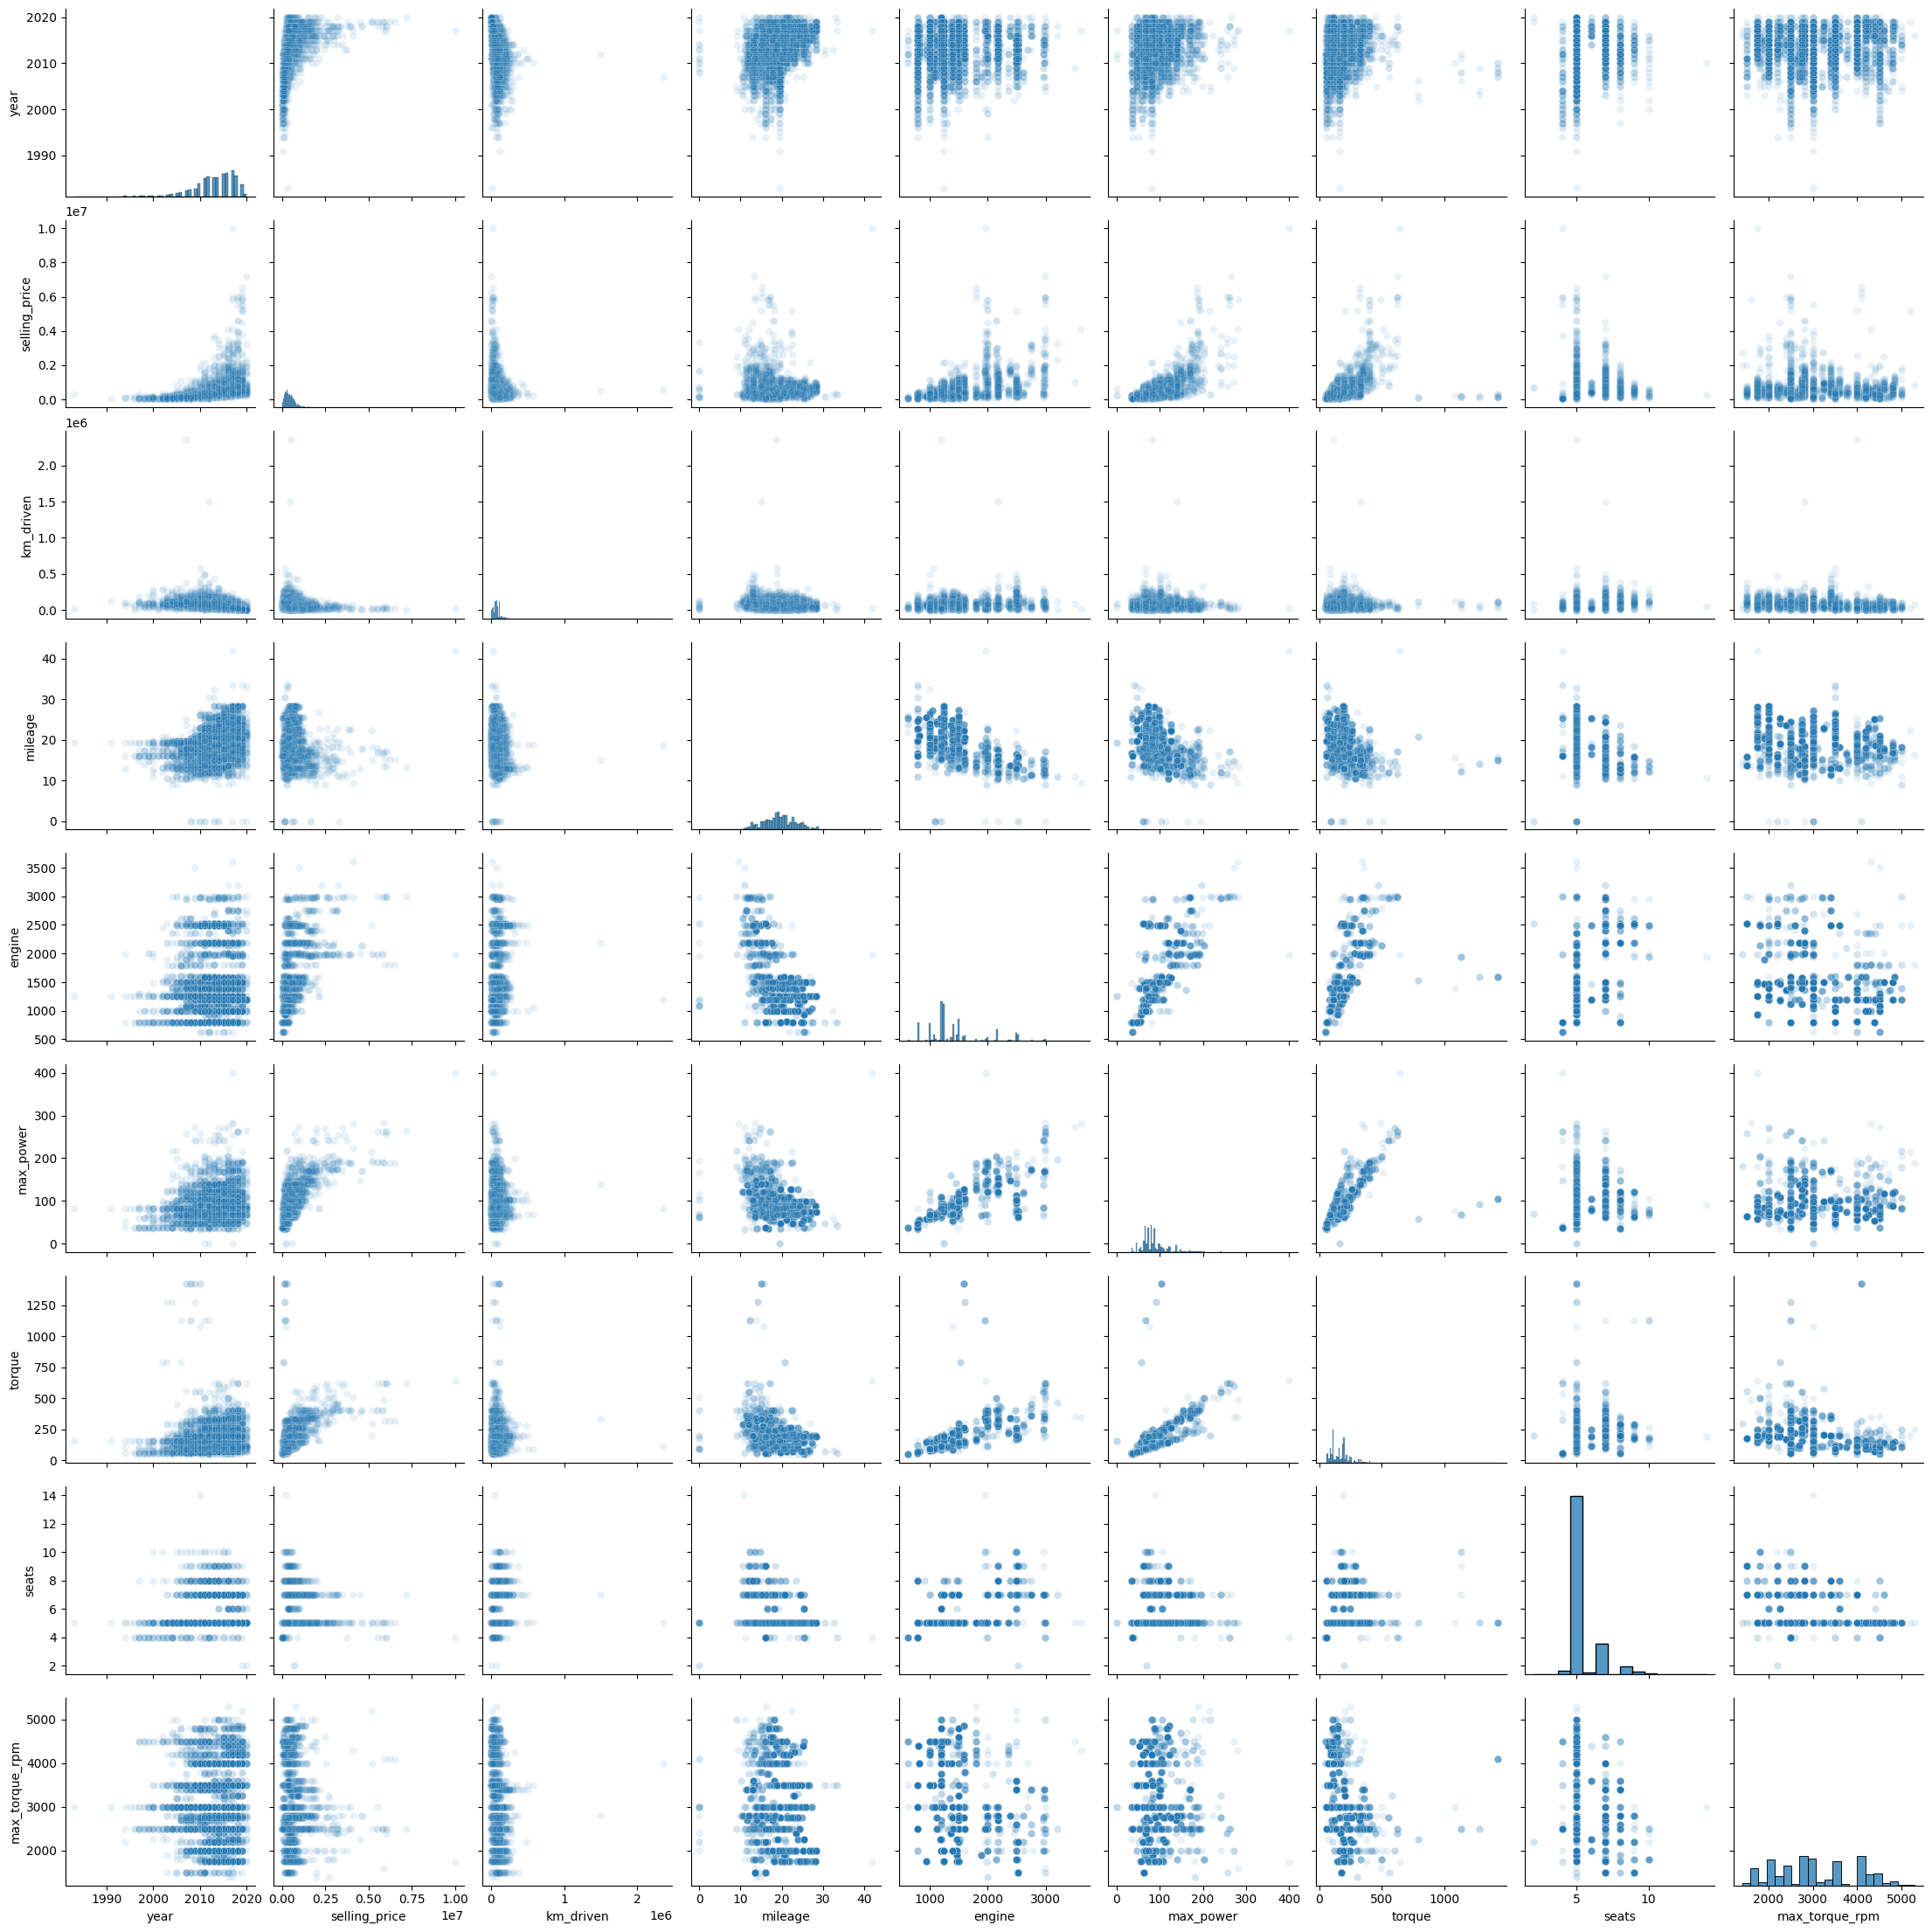

In [41]:
%matplotlib inline
sns.pairplot(df_train, plot_kws={'alpha':0.1})

Можно ли предположить на основе распределений связь признаков с целевой переменной?

ну как я выше писал и как видно по графу, у нас есть несколько переменных которые коррелируют с ценой:
- torque (позитивная)
- max_power (позитивная)
- engine (позитивная)
- mileage (отрицательная, но скорее всего из-за скрытой переменной, о ней ниже)
- km_driven (отрицательная, но много шума около нуля, где цена самая большая)
- year (позитивная)
- max_torque_rpm (нет связи)
- seats (нет связи*)

\* связь видна, но у нас куда больше машин с 5 сидениями, чем с другим количеством, и в этой категории самый большой диапазон будет марок

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, есть корреляции, мои самые любимые:
- torque/max_power/engine/milage/max_torque_rpm - имеют связь, и причём за исключением шума могут быть описанны ~одной переменной:
    - чем больше двигатель - тем больше расход (engine-mileage)
    - чем больше двигатель - тем он мощнее (engine-max_power)
    - чем двигатель мощнее - тем больше крутящий момент (max_power-torque)
    - чем выше крутящий момент, тем меньше обороты (не очень большая связь, но существует и физически обоснована)

- есть ещё зависимость (year-max_power), где чем машина новее, тем больше выбор двигателей => нижняя граница не двигается почти, а верхняя растёт

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [42]:
df_train.corr(numeric_only='True')

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.059957       0.478235   0.110235 -0.237932  0.610322   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.058154      -0.089982  -0.219733 -0.179460 -0.259700   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.059957  0.041178        0.058154  
selling_price    0.692814  0.478235  0.149953       -0.089982  
km_driven        0.024588  0.110235  0.192328       -0.219733  
mileage         -0.373390 -0.237932 -0.451059       -0.179460  
engine           0.681117  0.610322  0.652172       -0.259700  
max_power        1.000000  0.674279  0.244112       -0.022548  
torque           0.674279  1.000000  0.318832       -0.344164  
seats            0.244112  0.318832  1.000000       -0.221442  
max_torque_rpm  -0.022548 -0.344164 -0.221442        1.000000

<Axes: >

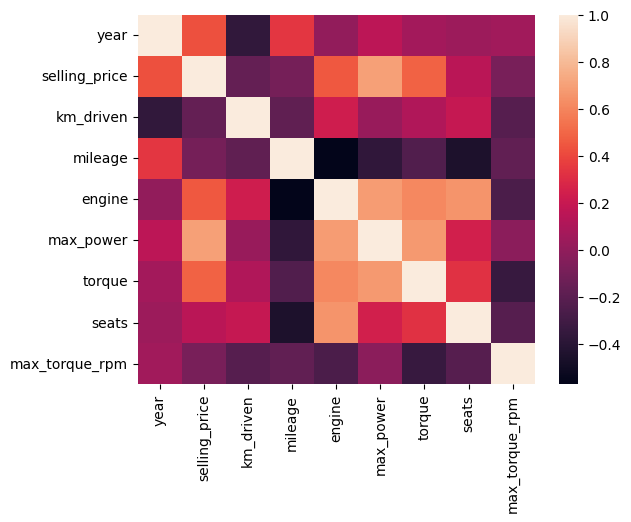

In [43]:
sns.heatmap(df_train.corr(numeric_only='True'))

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

- year-engine
- selling_price-max_power
- Да
- стандартная - pearson, так же доступны, kendall, spearman, ну и самописные при желании

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [x] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты


In [44]:
def custom_spearman(x,y):
  # http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%A1%D0%BF%D0%B8%D1%80%D0%BC%D0%B5%D0%BD%D0%B0#cite_note-0:~:text=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%A1%D0%BF%D0%B8%D1%80%D0%BC%D0%B5%D0%BD%D0%B0%20%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D0%BF%D0%BE%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B5%3A
  x_rang = np.argsort(np.argsort(x))
  y_rang = np.argsort(np.argsort(y))
  n = len(x)
  sum_ = np.sum((x_rang-y_rang)**2)
  p = 1 - 6/((n-1)*n*(n+1))*sum_
  return p

In [45]:
df_train.corr(numeric_only='True', method=custom_spearman)

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705000  -0.567515  0.344084 -0.038890   
selling_price   0.705000       1.000000  -0.295361  0.026304  0.462853   
km_driven      -0.567515      -0.295361   1.000000 -0.199209  0.302392   
mileage         0.344084       0.026304  -0.199209  1.000000 -0.427873   
engine         -0.038890       0.462853   0.302392 -0.427873  1.000000   
max_power       0.165512       0.611666   0.040921 -0.308598  0.710989   
torque          0.102431       0.582685   0.241876 -0.161986  0.839199   
seats           0.020476       0.214398   0.160072 -0.303668  0.375382   
max_torque_rpm  0.077320      -0.126673  -0.320304 -0.174010 -0.369247   

                max_power    torque     seats  max_torque_rpm  
year             0.165512  0.102431  0.020476        0.077320  
selling_price    0.611666  0.582685  0.214398       -0.126673  
km_driven        0.040921  0.241876  0.160072       -0.320304  
mileage         -0.308598 -0.161986 -0.303668       -0.174010  
engine           0.710989  0.839199  0.375382       -0.369247  
max_power        1.000000  0.778936  0.222314       -0.023849  
torque           0.778936  1.000000  0.320014       -0.524128  
seats            0.222314  0.320014  1.000000       -0.150742  
max_torque_rpm  -0.023849 -0.524128 -0.150742        1.000000

In [46]:
df_train.corr(numeric_only='True', method=custom_spearman) - df_train.corr(numeric_only='True', method='spearman')

year  selling_price  km_driven   mileage    engine  \
year            0.000000      -0.002122   0.002144 -0.002048 -0.000835   
selling_price  -0.002122       0.000000   0.000304  0.000118 -0.000723   
km_driven       0.002144       0.000304   0.000000 -0.000742 -0.002112   
mileage        -0.002048       0.000118  -0.000742  0.000000  0.001998   
engine         -0.000835      -0.000723  -0.002112  0.001998  0.000000   
max_power      -0.000286      -0.000592   0.000002  0.000226 -0.002125   
torque         -0.000637      -0.000128  -0.000674 -0.000043 -0.003114   
seats          -0.027814      -0.103206  -0.035245  0.131790 -0.152333   
max_torque_rpm  0.000391       0.001180   0.001792  0.001115  0.005022   

                max_power    torque     seats  max_torque_rpm  
year            -0.000286 -0.000637 -0.027814        0.000391  
selling_price   -0.000592 -0.000128 -0.103206        0.001180  
km_driven        0.000002 -0.000674 -0.035245        0.001792  
mileage          0.000226 -0.000043  0.131790        0.001115  
engine          -0.002125 -0.003114 -0.152333        0.005022  
max_power        0.000000 -0.000657 -0.082543        0.002584  
torque          -0.000657  0.000000 -0.117813        0.003916  
seats           -0.082543 -0.117813  0.000000        0.053874  
max_torque_rpm   0.002584  0.003916  0.053874        0.000000

<Axes: >

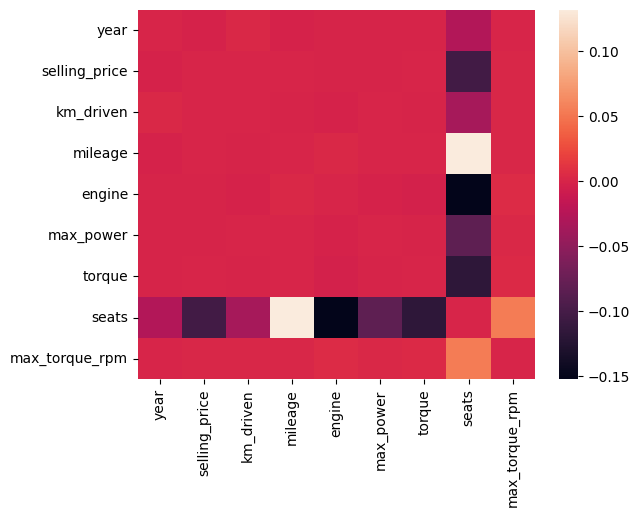

In [47]:
sns.heatmap(df_train.corr(numeric_only='True', method=custom_spearman) - df_train.corr(numeric_only='True', method='spearman'))

In [48]:
def custom_spearman_2_electric_boogaloo(x,y):
  # https://wiki.loginom.ru/articles/rank-correlation-spearman.html#:~:text=%D0%A1%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D1%82,%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2
  # и безумие мозга после (почти) непрерывных 8 часов решения домашки
  n = len(x)-1
  _, inverse_x, counts_x = np.unique(x,return_inverse=True, return_counts=True)
  mean_rang_x = np.array([0] + list(np.cumsum(counts_x)))
  mean_rang_x = (mean_rang_x[:-1] +mean_rang_x[1:]-1) / 2
  rang_x = mean_rang_x[inverse_x]
  sum_x = np.sum((rang_x-(n/2))**2)

  _, inverse_y, counts_y = np.unique(y,return_inverse=True, return_counts=True)
  mean_rang_y = np.array([0] + list(np.cumsum(counts_y)))
  mean_rang_y = (mean_rang_y[:-1] +mean_rang_y[1:]-1) / 2
  rang_y = mean_rang_y[inverse_y]
  sum_y = np.sum((rang_y-(n/2))**2)

  sum_d = np.sum((rang_x-(n/2))*(rang_y-(n/2)))

  p = (sum_d) / (np.sqrt(sum_x*sum_y))
  return p

In [49]:
df_train.corr(numeric_only='True', method=custom_spearman_2_electric_boogaloo)

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
torque          0.103069       0.582813   0.242549 -0.161943  0.842313   
seats           0.048291       0.317605   0.195317 -0.435458  0.527716   
max_torque_rpm  0.076929      -0.127853  -0.322095 -0.175124 -0.374270   

                max_power    torque     seats  max_torque_rpm  
year             0.165798  0.103069  0.048291        0.076929  
selling_price    0.612258  0.582813  0.317605       -0.127853  
km_driven        0.040919  0.242549  0.195317       -0.322095  
mileage         -0.308824 -0.161943 -0.435458       -0.175124  
engine           0.713113  0.842313  0.527716       -0.374270  
max_power        1.000000  0.779593  0.304857       -0.026434  
torque           0.779593  1.000000  0.437828       -0.528044  
seats            0.304857  0.437828  1.000000       -0.204616  
max_torque_rpm  -0.026434 -0.528044 -0.204616        1.000000

In [50]:
df_train.corr(numeric_only='True', method=custom_spearman_2_electric_boogaloo) - df_train.corr(numeric_only='True', method='spearman')

year  selling_price  km_driven  mileage  engine  max_power  \
year             0.0            0.0        0.0      0.0     0.0        0.0   
selling_price    0.0            0.0        0.0      0.0     0.0        0.0   
km_driven        0.0            0.0        0.0      0.0     0.0        0.0   
mileage          0.0            0.0        0.0      0.0     0.0        0.0   
engine           0.0            0.0        0.0      0.0     0.0        0.0   
max_power        0.0            0.0        0.0      0.0     0.0        0.0   
torque           0.0            0.0        0.0      0.0     0.0        0.0   
seats            0.0            0.0        0.0      0.0     0.0        0.0   
max_torque_rpm   0.0            0.0        0.0      0.0     0.0        0.0   

                torque  seats  max_torque_rpm  
year               0.0    0.0             0.0  
selling_price      0.0    0.0             0.0  
km_driven          0.0    0.0             0.0  
mileage            0.0    0.0             0.0  
engine             0.0    0.0             0.0  
max_power          0.0    0.0             0.0  
torque             0.0    0.0             0.0  
seats              0.0    0.0             0.0  
max_torque_rpm     0.0    0.0             0.0

Ну разница между двумя вариантами функций в том, что первая неправильно обрабатывает последовательности "категориальные" (в которых много элементов имеют одинаковые значения и как следствие ранги), вторая версия это поддерживает

In [51]:
import phik

In [52]:
df_train.drop(columns=['name']).phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


year  selling_price  km_driven      fuel  seller_type  \
year            1.000000       0.219841   0.081574  0.205834     0.232412   
selling_price   0.219841       1.000000   0.000000  0.157885     0.334505   
km_driven       0.081574       0.000000   1.000000  0.046285     0.000000   
fuel            0.205834       0.157885   0.046285  1.000000     0.050771   
seller_type     0.232412       0.334505   0.000000  0.050771     1.000000   
transmission    0.153714       0.463058   0.012824  0.053721     0.127968   
owner           0.418636       0.557641   0.087887  0.030943     0.176612   
mileage         0.279253       0.649768   0.081625  0.582304     0.064736   
engine          0.213156       0.503682   0.210747  0.644421     0.160346   
max_power       0.381639       0.872166   0.000000  0.236006     0.331904   
torque          0.269993       0.712206   0.026569  0.610168     0.235571   
seats           0.288178       0.196447   0.096223  0.450714     0.032173   
max_torque_rpm  0.265813       0.195023   0.102051  0.682312     0.127682   

                transmission     owner   mileage    engine  max_power  \
year                0.153714  0.418636  0.279253  0.213156   0.381639   
selling_price       0.463058  0.557641  0.649768  0.503682   0.872166   
km_driven           0.012824  0.087887  0.081625  0.210747   0.000000   
fuel                0.053721  0.030943  0.582304  0.644421   0.236006   
seller_type         0.127968  0.176612  0.064736  0.160346   0.331904   
transmission        1.000000  0.096990  0.331889  0.520161   0.511877   
owner               0.096990  1.000000  0.152406  0.186011   0.121438   
mileage             0.331889  0.152406  1.000000  0.588155   0.687235   
engine              0.520161  0.186011  0.588155  1.000000   0.720780   
max_power           0.511877  0.121438  0.687235  0.720780   1.000000   
torque              0.392981  0.070788  0.431509  0.677367   0.864805   
seats               0.045734  0.046741  0.679979  0.603400   0.569587   
max_torque_rpm      0.165750  0.178351  0.413044  0.744129   0.511465   

                  torque     seats  max_torque_rpm  
year            0.269993  0.288178        0.265813  
selling_price   0.712206  0.196447        0.195023  
km_driven       0.026569  0.096223        0.102051  
fuel            0.610168  0.450714        0.682312  
seller_type     0.235571  0.032173        0.127682  
transmission    0.392981  0.045734        0.165750  
owner           0.070788  0.046741        0.178351  
mileage         0.431509  0.679979        0.413044  
engine          0.677367  0.603400        0.744129  
max_power       0.864805  0.569587        0.511465  
torque          1.000000  0.409803        0.499969  
seats           0.409803  1.000000        0.383589  
max_torque_rpm  0.499969  0.383589        1.000000

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

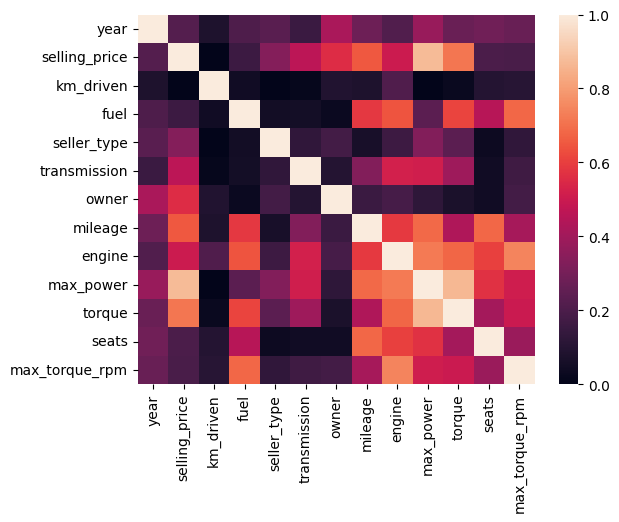

In [53]:
sns.heatmap(df_train.drop(columns=['name']).phik_matrix())

phik может считать корреляцию между числовыми и категориальными значениями (из коробки), что прикольно

странно что пропала связь km_driven-year, потому что она логична и наблюдается в остальных корреляциях

зависимость двигателя описанная выше (mileage/engine/max_power/torque/max_torque_rpm/fuel) - тут присутствует, что приятно наблюдать

видно что так же видимо torque зависит от fuel, что логично, я бы предположил, что torque больше у diesel, ещё есть какая-то корреляция между видом топлива и количеством сидений

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [54]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [55]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40    1248      74.00   
1  Individual       Manual  Second Owner    21.14    1498     103.52   
2  Individual       Manual   First Owner    23.00    1396      90.00   
3  Individual       Manual   First Owner    16.10    1298      88.20   
4  Individual       Manual   First Owner    20.14    1197      81.86   

       torque  seats  max_torque_rpm  
0  190.000000      5          2000.0  
1  250.000000      5          2500.0  
2  219.666720      5          2750.0  
3  112.775325      5          4500.0  
4  113.750000      5          4000.0

In [56]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name','fuel','seller_type','transmission','owner','year','selling_price'])

In [57]:
# assert X_train.shape == (5840, 6)
assert X_train.shape == (5840, 7)

In [58]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name','fuel','seller_type','transmission','owner','year','selling_price'])

In [59]:
# assert X_test.shape == (1000, 6)
assert X_test.shape == (1000, 7)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [61]:
LR = LinearRegression().fit(X_train, y_train)

In [62]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

print(f'Train R^2: {r2_score(y_train, y_pred_train)}\t Test R^2: {r2_score(y_test, y_pred_test)}')
print(f'Train MSE: {MSE(y_train, y_pred_train)}\t Test MSE: {MSE(y_test, y_pred_test)}')

Train R^2: 0.5421912068831485	 Test R^2: 0.5701957213636668
Train MSE: 131225551744.6438	 Test MSE: 247063772695.74695


### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [63]:
def custom_r2(y_true,y_pred):
  ss_res = np.sum((y_true-y_pred)**2)
  ss_tot = np.sum((y_true-np.mean(y_true))**2)
  return 1 - ss_res/ss_tot

In [64]:
print(f'Train R^2: {custom_r2(y_train, y_pred_train)}\t Test R^2: {custom_r2(y_test, y_pred_test)}')

Train R^2: 0.5421912068831485	 Test R^2: 0.5701957213636668


$R^2 = 1-\frac{SS_{res}}{SS_{tot}}$

$SS_{res}$ - показывает насколько модель сильно ошибается от правильного предсказания, чем хуже предсказания, тем больше абсолюьная разница и соответственно квадрат разницы

$SS_{tot}$ - это "худшее" предсказание - предсказания модели которая отвечает средним значением

Соответсвенно, чем лучше предсказания, тем меньше их квадрат разности с правильным ответом, и тем меньше $SS_res$ и $R^2$ ближе к 1

Ну и получается что так-то $R^2$ может быть меньше 0 и больше 1, если модель хуже, чем среднее по ответам, что ещё постараться надо

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [65]:
def custom_r_bar_2(y_true,y_pred,X):
  n,p = X.shape
  r2 = custom_r2(y_true,y_pred)
  coeff = (n-1)/(n-p-1)
  return 1- (1-r2)*coeff

In [66]:
print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.5421912068831485	 Test R^2:	0.5701957213636668
Train adj_R^2:	0.5416417107322881	 Test adj_R^2:	0.5671628282684507
Train MSE:	131225551744.6438	 Test MSE:	247063772695.74695


Ну если писать через дополнительный коэффициент, то его можно интерпретировать как сложность модели, чем больше столбцов в данных, тем больше будет коэффициент и как следствие меньше $R^2$

Ну то есть да, мы можем его использовать для того, чтобы понять стоит добавлять ли новые столбцы, или это не приведёт к улучшению, а только увеличит сложность модель

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
stand_scaler = StandardScaler().fit(X_train)

In [69]:
scaled_X_train = stand_scaler.transform(X_train)
scaled_X_test = stand_scaler.transform(X_test)

In [70]:
LR = LinearRegression().fit(scaled_X_train, y_train)

y_pred_train = LR.predict(scaled_X_train)
y_pred_test = LR.predict(scaled_X_test)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.5421912068831485	 Test R^2:	0.5701957213636663
Train adj_R^2:	0.5416417107322881	 Test adj_R^2:	0.5671628282684502
Train MSE:	131225551744.6438	 Test MSE:	247063772695.74722


Почти 0 изменений

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [71]:
print(*[f'{item[0]:10}\t{item[1]}' for item in zip(X_train.columns, np.abs(LR.coef_))], sep='\n')

km_driven 	100336.26868868973
mileage   	90488.92670552881
engine    	42974.13254845621
max_power 	381064.2862892206
torque    	11374.921085898999
seats     	15276.263612867664
max_torque_rpm	34762.80092803751


max_power, что логично, учитывая, что он имеет большие коэффициенты корреляции с ценой

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [72]:
from sklearn.linear_model import Lasso

In [73]:
LR = Lasso().fit(scaled_X_train, y_train)

y_pred_train = LR.predict(scaled_X_train)
y_pred_test = LR.predict(scaled_X_test)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.5421912068254618	 Test R^2:	0.5701948290995444
Train adj_R^2:	0.5416417106745322	 Test adj_R^2:	0.5671619297081097
Train MSE:	131225551761.17899	 Test MSE:	247064285594.64362


никакого изменения

In [74]:
print(*[f'{item[0]:10}\t{item[1]}' for item in zip(X_train.columns, np.abs(LR.coef_))], sep='\n')

km_driven 	100335.10446651686
mileage   	90486.71434092196
engine    	42972.61834798221
max_power 	381060.6073721384
torque    	11370.088941235213
seats     	15274.772690779404
max_torque_rpm	34761.08542856495


Неа, модель ничего не занулила, скорее всего потому что очень мало features, чтобы жертвовать какой-либо

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [77]:
param_grid = [
    {'alpha': np.logspace(-1, 5, 55)}
]

In [78]:
CV = GridSearchCV(Lasso(), param_grid, cv=10).fit(scaled_X_train, y_train)

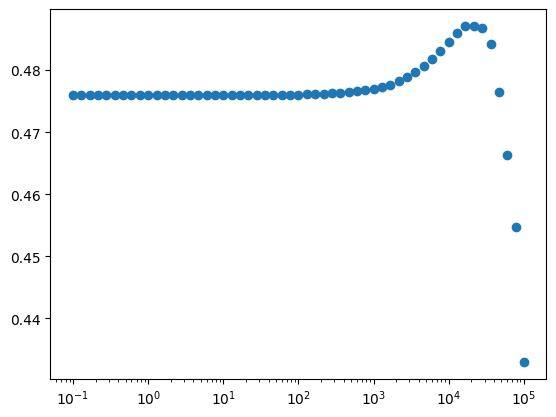

In [79]:
plt.xscale('log')
plt.scatter(param_grid[0]['alpha'], CV.cv_results_['mean_test_score'])

In [80]:
LR = CV.best_estimator_

y_pred_train = LR.predict(scaled_X_train)
y_pred_test = LR.predict(scaled_X_test)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.531762999756316	 Test R^2:	0.5463697011655079
Train adj_R^2:	0.5312009868959412	 Test adj_R^2:	0.5431686809116354
Train MSE:	134214675707.53088	 Test MSE:	260759649472.867


In [81]:
print(*[f'{item[0]:10}\t{item[1]}' for item in zip(X_train.columns, np.abs(LR.coef_))], sep='\n')

km_driven 	74873.72129448237
mileage   	43441.18106001398
engine    	7060.106033011511
max_power 	362061.44611131743
torque    	0.0
seats     	0.0
max_torque_rpm	25289.952272748287


In [82]:
LR.alpha

np.float64(21544.346900318822)

- 10 (количество cv-fold) * 55 (количество значений для перебора) = 550 моделей
- Я решил выбрать только `alpha` для подбора, он контроллирует L1 регуляризацию, остальные параметры у Lasso больше для всякой стабильности и скорости вычислений, что не должно (значительно) менять модель
- лучший параметр регуляризации крутится где-то у 20000, иногда выше, иногда ниже, хотя при пространстве ближе к 1, он выбирается как 1
- torque и seats занулились, что ожидаемо, из EDA сделанного ранее

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [83]:
from sklearn.linear_model import ElasticNet

In [84]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [85]:
param_grid = [{
    'alpha': np.logspace(-2, 2, 21),
    'l1_ratio': np.linspace(1e-5, 1-1e-5, 15)
}]

In [86]:
CV = GridSearchCV(ElasticNet(), param_grid, cv=10).fit(scaled_X_train, y_train)

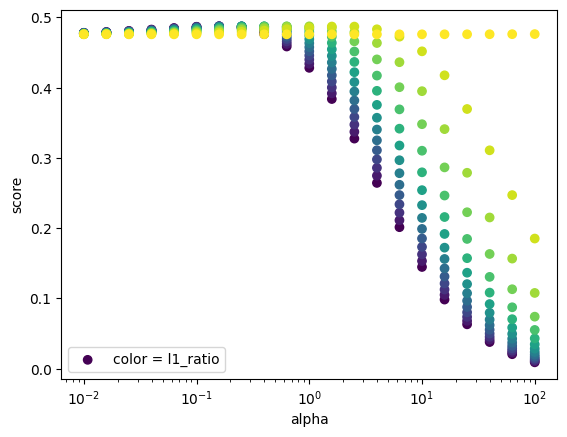

In [87]:
plt.xscale('log')
plt.scatter(CV.cv_results_['param_alpha'].data, CV.cv_results_['mean_test_score'], c=CV.cv_results_['param_l1_ratio'].data)
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(['color = l1_ratio'])

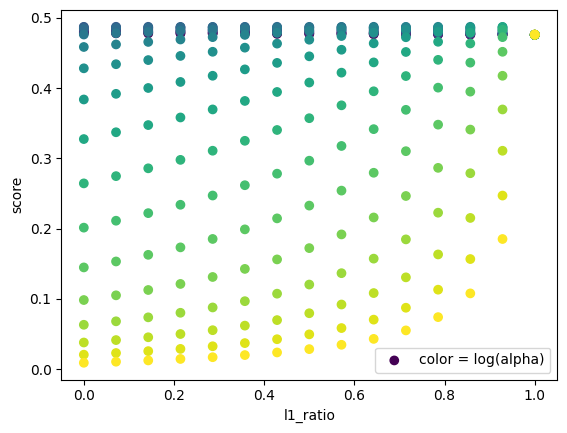

In [88]:
plt.scatter(CV.cv_results_['param_l1_ratio'].data, CV.cv_results_['mean_test_score'], c=np.log(CV.cv_results_['param_alpha'].data))
plt.xlabel('l1_ratio')
plt.ylabel('score')
plt.legend(['color = log(alpha)'])

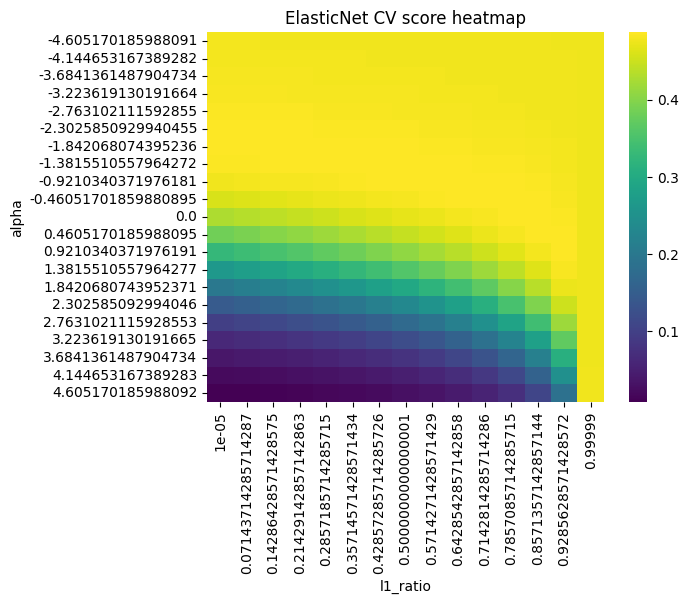

In [89]:
temp = pd.DataFrame({
    "l1_ratio": CV.cv_results_['param_l1_ratio'].data,
    "alpha": np.log(CV.cv_results_['param_alpha'].data),
    "score": CV.cv_results_['mean_test_score']
})

# Матрица для тепловой карты
pivot = temp.pivot(columns="l1_ratio", index="alpha", values="score")

# Рисуем heatmap
sns.heatmap(pivot, cmap="viridis")
plt.ylabel("alpha")
plt.xlabel("l1_ratio")
plt.title("ElasticNet CV score heatmap")
plt.show()

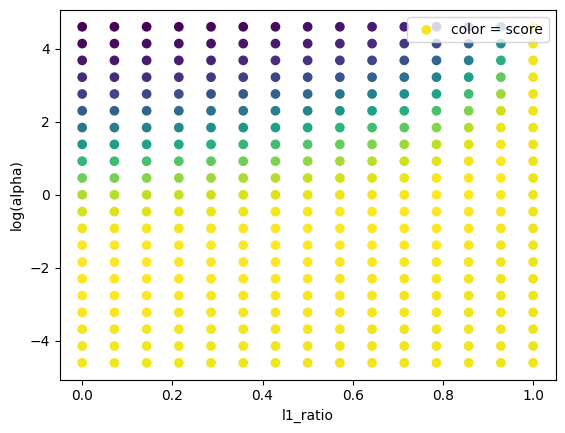

In [90]:
plt.scatter(CV.cv_results_['param_l1_ratio'].data, np.log(CV.cv_results_['param_alpha'].data), c=CV.cv_results_['mean_test_score'])
plt.xlabel('l1_ratio')
plt.ylabel('log(alpha)')
plt.legend(['color = score'])

In [91]:
LR = CV.best_estimator_

y_pred_train = LR.predict(scaled_X_train)
y_pred_test = LR.predict(scaled_X_test)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.5292163367141833	 Test R^2:	0.5313582446767917
Train adj_R^2:	0.528651267159485	 Test adj_R^2:	0.5280512968065674
Train MSE:	134944646970.28523	 Test MSE:	269388663324.30502


In [92]:
print(*[f'{item[0]:10}\t{item[1]}' for item in zip(X_train.columns, np.abs(LR.coef_))], sep='\n')

km_driven 	93010.99101141458
mileage   	69036.42332910262
engine    	70193.33625235157
max_power 	285574.76541948336
torque    	36734.543284072846
seats     	1413.507649067769
max_torque_rpm	16821.498760886774


In [93]:
LR.get_params()

{'alpha': np.float64(1.0),
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': np.float64(0.8571357142857144),
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [94]:
# Пупупупупу чёт функция потерь у неё не лёгкая....

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

Анализ:

Он весь закоментирован, чтобы не мешать исполнению кода, но не удалён, чтобы доказать, что я свою кровь и пот на него потратил

In [95]:
# [item[0] for item in df_train['name'].str.split().values]

In [96]:
# words, counts = np.unique([item[0] for item in df_train['name'].str.split().values], return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [97]:
# words, counts = np.unique([item[-1] for item in df_train['name'].str.split().values], return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [98]:
# df_train['name'].str.split()

In [99]:
# words, counts = np.unique(np.concat([item[1:2] if len(item)>1 else [''] for item in df_train['name'].str.split().values]), return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [100]:
# words, counts = np.unique(np.concat([[len(item)] for item in df_train['name'].str.split().values]), return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [101]:
brand_names = ['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

In [102]:
# standarts = ['bsiii', 'bs iii', 'BSIV', 'bs iv', 'bsii', 'bs ii', 'euroiii', 'euro iii','euro ii','euro i',]

In [103]:
# modifiers = ['vxi','lxi','zxi','vdi','zdi','ldi', 'plus', 'sx','sportz', 'magna', 'lx', 's', 'vx']
# modifiers = ['vxi','lxi','vdi', 'vlx', 'vx', 'sx', 'lx', 'ldi', 'zxi','plus', 'Crdi','tdi', 'asta', 'sportz', 'magna', 'grand', 'neo', 'vista', '2wd', '4wd', '']

In [104]:
drive_mode = [
    '2wd', '4wd', '4x2','4x4', 'awd', 'fwd',
]

In [105]:
model_names = ['3 Series', '309', '5 Series', '6 Series', '7 Series', '800', 'A-Star', 'A3', 'A4', 'A6',
       'Accent', 'Accord', 'Alto', 'Amaze', 'Ameo', 'Aria', 'Aspire',
       'Aveo', 'Avventura', 'B', 'BR-V', 'BRV', 'Baleno', 'Beat',
       'Bolero', 'Bolt', 'Brio', 'CLA', 'CLASSIC', 'CR-V', 'Camry',
       'Captiva', 'Captur', 'Celerio', 'Ciaz', 'City', 'Civic', 'Classic',
       'Compass', 'Corolla', 'Creta', 'CrossPolo', 'Cruze', 'D-Max',
       'Duster', 'Dzire', 'E-Class', 'EON', 'ES', 'EcoSport', 'Ecosport',
       'Eeco', 'Elantra', 'Elite', 'Endeavour', 'Enjoy', 'Ertiga',
       'Estate', 'Esteem', 'Estilo', 'Etios', 'Fabia', 'Fiesta', 'Figo',
       'Fluence', 'Fortuner', 'Freestyle', 'Fusion', 'GL-Class', 'GLA',
       'GLC', 'GO', 'GTI', 'Getz', 'Glanza', 'Grand i20', 'Grand 2000', 'Grande', 'Gurkha',
       'Gypsy', 'Harrier', 'Hector', 'Hexa', 'Ignis', 'Ikon', 'Indica',
       'Indigo', 'Ingenio', 'Innova', 'Jazz', 'Jeep', 'Jetta', 'KUV',
       'KWID', 'Kicks', 'Koleos', 'Lancer', 'Land', 'Laura', 'Linea',
       'Lodgy', 'Logan', 'M-Class', 'MU', 'MUX', 'Manza', 'Marazzo',
       'Marshal', 'Matiz', 'Micra', 'Mobilio', 'Multivan', 'Nano', 'New',
       'Nexon', 'NuvoSport', 'Octavia', 'Omni', 'One', 'Optra', 'Pajero',
       'Palio', 'Passat', 'Platinum', 'Polo', 'Premio', 'Pulse', 'Punto',
       'Q3', 'Q5', 'Q7', 'Qualis', 'Quanto', 'Rapid', 'RediGO', 'Renault',
       'Ritz', 'Rover', 'S-Class', 'S-Cross', 'S-Presso', 'S60', 'S90',
       'SX4', 'Safari', 'Sail', 'Santa', 'Santro', 'Scala', 'Scorpio',
       'Seltos', 'Sonata', 'Spacio', 'Spark', 'Ssangyong', 'Sumo',
       'Sunny', 'Superb', 'Supro', 'Swift', 'TUV', 'Tavera', 'Teana',
       'Terrano', 'Thar', 'Tiago', 'Tigor', 'Trailblazer', 'Triber',
       'Tucson', 'V40', 'Vento', 'Venture', 'Venue', 'Verito', 'Verna',
       'Vitara', 'WR-V', 'Wagon', 'Willys', 'Winger', 'Wrangler', 'X1',
       'X3', 'X4', 'X6', 'X7', 'XC40', 'XC90', 'XE', 'XF', 'XL6',
       'XUV300', 'XUV500', 'Xcent', 'Xenon', 'Xylo', 'Yaris', 'Yeti',
       'Zen', 'Zest', 'i10', 'i20']

In [106]:
# trash = ['5 seater','7 Seater', '8 Seater', '9 Seater', '10 seater', '7 Str Captain Seat', '7 Seats', '8 Seats', '9 Seats', '10 Seats', '7(C) seats',
#          '2011-2019', '2015-2019', '2009-2014', '2001-2011', '2006-2009', '2018', '2019-2020', '2000', '2016-2019',
#          'optional','option',
#          '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6',
#        '1.8', '1.9', '100', '110', '120', '177', '2.0', '2.2', '2.4',
#        '2.5', '2.6', '2.7', '2.8', '200', '220', '250',
#        '3.0', '3.2', '3.6', '300', '350', '400',
#        '500', '540', '550',
#          '1.2', '1.5', '1.4', '2.0', '2.2','1.0', '2.4','100','diesel', '(diesel)','1.6', '1.3', '2.5',  '800', '300', '3.0l', '3.0','3.6']

In [107]:
three_tokens = ['abs', 'ags',
       'avn', 'b1-', 'bhp', 'bs3', 'bs4', 'cbc', 'cdi', 'cgi', 'cng',
       'cr4', 'cvt', 'd70', 'd75', 'dci', 'dct', 'dgl', 'dle', 'dlg',
       'dls', 'dlx', 'dpe', 'dsg', 'dsl', 'dsz', 'duo', 'dv5', 'ecs',
       'els', 'elx', 'eps', 'era', 'evo', 'evx', 'exi',  'g80',
       'gdi', 'gld', 'gle', 'gls', 'glx', 'gvs', 'gxd', 'gxi', 'hse',
       'hte', 'htr', 'htx', 'iii', 'ipl', 'k10', 'ldi', 'lpg', 'lsi',
       'ltd', 'ltz', 'lxd', 'lxi', 'mdi', 'mpi', 'nav', 'neo',
       'non', 'nrg', 'nxt', 'opt', 'rx5', 'rx7', 'rxe', 'rxl', 'rxs',
       'rxt', 'rxz', 's10', 's11', 'sle', 'slx', 'std', 'str', 'sxi',
       't10', 'td4', 'tdi', 'top', 'trd', 'tsi', 'vct', 'vdc', 'vdi',
       'vgt', 'vls', 'vlx', 'vvt', 'vxd', 'vxi', 'w10', 'w11', 'xdb',
       'xlt', 'xms', 'xta', 'xza', 'zdi', 'zlx', 'zxi']

In [108]:
# def cut_words(s):
#   s = s.lower()
#   for item in brand_names:
#     s = s.replace(item.lower()+' ', ' ')
#   for item in model_names:
#     s = s.replace(' '+item.lower()+' ', ' ')
#   # for item in standarts:
#   #   s = s.replace(' '+item.lower(), ' ')
#   for item in modifiers:
#     s = s.replace(item.lower(), ' ')
#   for item in trash:
#     s = s.replace(item.lower(), ' ')
#   return s.strip()


In [109]:
# words, counts = np.unique(np.concat([[jtem for jtem in item if len(jtem) == 3] for item in df_train['name'].map(cut_words).str.split().values]), return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [110]:
# words, counts = np.unique(df_train['name'].map(cut_words), return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [111]:
# words, counts = np.unique(np.concat([item for item in df_train['name'].map(cut_words).str.split().values]), return_counts=True)
# for arg in np.argsort(counts)[::-1]:
#   print(words[arg], '\t', counts[arg])

In [112]:
# df_train[[len(item.replace('(Diesel)', '').replace('BS', '').replace('ABS', '').replace('Seater', '').replace('Dual Tone', '').replace('Zeta', '').replace('Sigma', '').split())>7 for item in df_train['name']]]

In [113]:
# df_train[[('cvt' in item.lower()) for item in df_train['name']]]['name'].unique()

In [114]:
def find_token(text, tokens):
    text = text.lower().split()
    for tok in tokens:
        tok_low = tok.lower()
        if tok_low in text:
            return tok
    return 'idk'

In [115]:
df_train['brand'] = df_train['name'].apply(lambda s: find_token(s, brand_names))
# df_train['model_name'] = df_train['name'].apply(lambda s: find_token(s, model_names))
# df_train['drive_mode'] = df_train['name'].apply(lambda s: find_token(s, drive_mode))
# df_train['three_tokens'] = df_train['name'].apply(lambda s: find_token(s, three_tokens))

In [116]:
df_test['brand'] = df_test['name'].apply(lambda s: find_token(s, brand_names))

In [117]:
df_train.shape

(5840, 15)

In [118]:
# df_test = df_test.drop(columns=['model_name','drive_mode','three_tokens'])
# df_train = df_train.drop(columns=['model_name','drive_mode','three_tokens'])

In [119]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

In [120]:
# assert X_train_cat.shape == (5840, 11)
assert X_train_cat.shape == (5840, 13)

In [121]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [122]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [123]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm',
       'brand'],
      dtype='object')

In [124]:
OHE = OneHotEncoder(drop='first').fit(X_train_cat.drop(columns=['km_driven','mileage','engine','max_power','torque','max_torque_rpm']))

In [125]:
X_train_wcat = OHE.transform(X_train_cat.drop(columns=['km_driven','mileage','engine','max_power','torque','max_torque_rpm']))
X_test_wcat = OHE.transform(X_test_cat.drop(columns=['km_driven','mileage','engine','max_power','torque','max_torque_rpm']))

In [126]:
stand_scaler = StandardScaler().fit(X_train.drop(columns=['seats']))

In [127]:
scaled_X_train = stand_scaler.transform(X_train.drop(columns=['seats']))
scaled_X_test = stand_scaler.transform(X_test.drop(columns=['seats']))

In [128]:
X_train_wcat = np.concat((X_train_wcat.toarray(), scaled_X_train), axis=1)
X_test_wcat = np.concat((X_test_wcat.toarray(), scaled_X_test), axis=1)

In [129]:
LR = Lasso().fit(X_train_wcat, y_train)

y_pred_train = LR.predict(X_train_wcat)
y_pred_test = LR.predict(X_test_wcat)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.7912919606962893	 Test R^2:	0.7864209516767381
Train adj_R^2:	0.7910414537904035	 Test adj_R^2:	0.7849138414567151
Train MSE:	59823725587.94812	 Test MSE:	122771335862.29416


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- OHE нужно обучать только на train, как и остальные трансформации, ну и не раздувать излишне таблицу
- Чтобы поддерживать линейную независимость (a+b+c=1 <=> a+b=-c)
- Да, мы можем их удалить, потому что тогда они будут обрабатываться как базовый класс, что и так происходит

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [130]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

In [131]:
LR = Ridge().fit(X_train_wcat, y_train)

y_pred_train = LR.predict(X_train_wcat)
y_pred_test = LR.predict(X_test_wcat)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.7881197166575581	 Test R^2:	0.7860582505116318
Train adj_R^2:	0.7878654021885256	 Test adj_R^2:	0.7845485809083873
Train MSE:	60733012348.07575	 Test MSE:	122979826849.1606


In [132]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [133]:
param_grid = [
    {'alpha': np.logspace(-2, 1, 21)}
]

In [134]:
CV = GridSearchCV(Ridge(), param_grid, cv=10).fit(X_train_wcat, y_train)

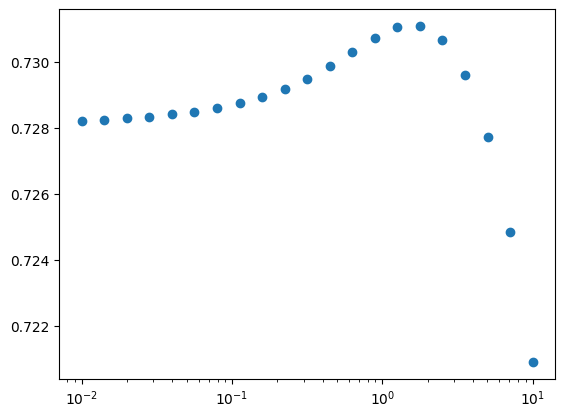

In [135]:
plt.xscale('log')
plt.scatter(param_grid[0]['alpha'], CV.cv_results_['mean_test_score'])

In [136]:
LR = CV.best_estimator_

y_pred_train = LR.predict(X_train_wcat)
y_pred_test = LR.predict(X_test_wcat)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.7849079674989019	 Test R^2:	0.7827057107156787
Train adj_R^2:	0.7846497980497408	 Test adj_R^2:	0.7811723840775837
Train MSE:	61653622790.13529	 Test MSE:	124906962457.78865


In [137]:
LR.alpha

np.float64(1.7782794100389228)

Да, удалось улучшить

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [138]:
df_train['brand'] = df_train['name'].apply(lambda s: find_token(s, brand_names))
df_train['model_name'] = df_train['name'].apply(lambda s: find_token(s, model_names))
df_train['drive_mode'] = df_train['name'].apply(lambda s: find_token(s, drive_mode))
df_train['three_tokens'] = df_train['name'].apply(lambda s: find_token(s, three_tokens))

In [139]:
df_test['brand'] = df_test['name'].apply(lambda s: find_token(s, brand_names))
df_test['model_name'] = df_test['name'].apply(lambda s: find_token(s, model_names))
df_test['drive_mode'] = df_test['name'].apply(lambda s: find_token(s, drive_mode))
df_test['three_tokens'] = df_test['name'].apply(lambda s: find_token(s, three_tokens))

In [140]:
OHE_new = OneHotEncoder(drop='first').fit(df_train.drop(columns=['name','selling_price', 'km_driven','mileage','engine','max_power','torque','max_torque_rpm']))

In [141]:
X_train_wcat_new = OHE_new.transform(df_train.drop(columns=['name','selling_price', 'km_driven','mileage','engine','max_power','torque','max_torque_rpm']))
X_test_wcat_new = OHE_new.transform(df_test.drop(columns=['name','selling_price', 'km_driven','mileage','engine','max_power','torque','max_torque_rpm']))

In [142]:
X_train_wcat_new = np.concat((X_train_wcat_new.toarray(), scaled_X_train), axis=1)
X_test_wcat_new = np.concat((X_test_wcat_new.toarray(), scaled_X_test), axis=1)

In [143]:
LR = Lasso().fit(X_train_wcat_new, y_train)

y_pred_train = LR.predict(X_train_wcat_new)
y_pred_test = LR.predict(X_test_wcat_new)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.8991933151748048	 Test R^2:	0.9152770505287627
Train adj_R^2:	0.8990723194968596	 Test adj_R^2:	0.9146792071353165
Train MSE:	28895060633.661118	 Test MSE:	48701170673.98021


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.605e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


In [144]:
LR = Ridge().fit(X_train_wcat_new, y_train)

y_pred_train = LR.predict(X_train_wcat_new)
y_pred_test = LR.predict(X_test_wcat_new)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.8849113585557583	 Test R^2:	0.9095246552203583
Train adj_R^2:	0.884773220611638	 Test adj_R^2:	0.90888622032776
Train MSE:	32988816947.444035	 Test MSE:	52007811760.57172


In [145]:
param_grid = [
    {'alpha': np.logspace(-2, 1, 21)}
]

In [146]:
CV = GridSearchCV(Ridge(), param_grid, cv=10).fit(X_train_wcat_new, y_train)

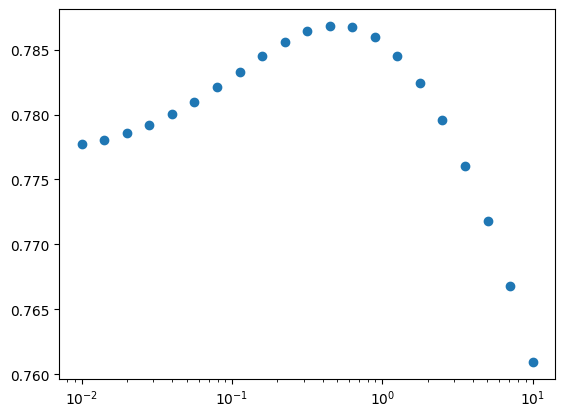

In [147]:
plt.xscale('log')
plt.scatter(param_grid[0]['alpha'], CV.cv_results_['mean_test_score'])

In [148]:
LR = CV.best_estimator_

y_pred_train = LR.predict(X_train_wcat_new)
y_pred_test = LR.predict(X_test_wcat_new)

print(f'Train R^2:\t{r2_score(y_train, y_pred_train)}\t Test R^2:\t{r2_score(y_test, y_pred_test)}')
print(f'Train adj_R^2:\t{custom_r_bar_2(y_train, y_pred_train, X_train)}\t Test adj_R^2:\t{custom_r_bar_2(y_test, y_pred_test, X_test)}')
print(f'Train MSE:\t{MSE(y_train, y_pred_train)}\t Test MSE:\t{MSE(y_test, y_pred_test)}')

Train R^2:	0.8934447498809177	 Test R^2:	0.9165343424655225
Train adj_R^2:	0.8933168543475101	 Test adj_R^2:	0.9159453710917913
Train MSE:	30542819837.442734	 Test MSE:	47978443365.95675


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [149]:
def business_metrics(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred)/y_true<0.1)

business_metrics(y_test, y_pred_test)

np.float64(0.309)

In [150]:
import time

In [151]:
for model in (LinearRegression, Lasso, ElasticNet, Ridge):
  for dataset in ((X_train,X_test,'base'), (scaled_X_train,scaled_X_test,'base_scale'), (X_train_wcat,X_test_wcat,'cat'), (X_train_wcat_new,X_test_wcat_new,'cat_new')):
    LR = model().fit(dataset[0], y_train)
    y_pred_test = LR.predict(dataset[1])
    print(f'{model.__name__:18} {dataset[2]:12} {business_metrics(y_test, y_pred_test)}')
  print('----')

LinearRegression   base         0.191
LinearRegression   base_scale   0.191
LinearRegression   cat          0.28
LinearRegression   cat_new      0.331
----
Lasso              base         0.191
Lasso              base_scale   0.191


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


Lasso              cat          0.281
Lasso              cat_new      0.33
----
ElasticNet         base         0.191
ElasticNet         base_scale   0.193
ElasticNet         cat          0.197
ElasticNet         cat_new      0.21
----
Ridge              base         0.191
Ridge              base_scale   0.191
Ridge              cat          0.276
Ridge              cat_new      0.307
----


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.605e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [152]:
def your_business_metrics(y_true, y_pred, lower_bound=0.05, upper_bound=0.2):
  under = (y_true-y_pred)/y_true>-lower_bound
  over = (y_true-y_pred)/y_true<upper_bound
  return np.mean(under * over)

your_business_metrics(y_test, y_pred_test)

np.float64(0.355)

In [153]:
for model in (LinearRegression, Lasso, ElasticNet, Ridge):
  for dataset in ((X_train,X_test,'base'), (scaled_X_train,scaled_X_test,'base_scale'), (X_train_wcat,X_test_wcat,'cat'), (X_train_wcat_new,X_test_wcat_new,'cat_new')):
    LR = model().fit(dataset[0], y_train)
    y_pred_test = LR.predict(dataset[1])
    print(f'{model.__name__:18} {dataset[2]:12} {your_business_metrics(y_test, y_pred_test)}')
  print('----')

LinearRegression   base         0.25
LinearRegression   base_scale   0.251
LinearRegression   cat          0.328
LinearRegression   cat_new      0.375
----
Lasso              base         0.25
Lasso              base_scale   0.251


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


Lasso              cat          0.33
Lasso              cat_new      0.375
----
ElasticNet         base         0.25
ElasticNet         base_scale   0.283
ElasticNet         cat          0.329
ElasticNet         cat_new      0.325
----
Ridge              base         0.25
Ridge              base_scale   0.252
Ridge              cat          0.32
Ridge              cat_new      0.355
----


C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.605e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


# **Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)**

### **Задание $24\frac34$**




Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [154]:
LR = Lasso().fit(X_train_wcat_new, y_train)

C:\Users\Human\jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.605e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


In [155]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power      torque  seats  max_torque_rpm    brand model_name  \
0         74.00  190.000000      5          2000.0   Maruti      Dzire   
1        103.52  250.000000      5          2500.0    Skoda      Rapid   
2         90.00  219.666720      5          2750.0  Hyundai        i20   
3         88.20  112.775325      5          4500.0   Maruti      Swift   
4         81.86  113.750000      5          4000.0  Hyundai      Xcent   
...         ...         ...    ...             ...      ...        ...   
5835      62.10   96.100000      5          3000.0  Hyundai     Santro   
5836      67.10   90.000000      5          3500.0   Maruti      Wagon   
5837      82.85  113.700000      5          4000.0  Hyundai        i20   
5838     110.00  235.357200      5          2750.0  Hyundai      Verna   
5839      73.90  190.000000      5          2000.0   Maruti      Dzire   

     drive_mode three_tokens  
0           idk          vdi  
1           idk          tdi  
2           idk          idk  
3           idk          vxi  
4           idk          idk  
...         ...          ...  
5835        idk          gls  
5836        idk          abs  
5837        idk          idk  
5838        idk          idk  
5839        idk          zdi  

[5840 rows x 18 columns]

In [156]:
import os
if not os.path.exists('./streamlit'):
  os.mkdir('./streamlit')

In [157]:
import pickle
with open('streamlit/best.pickle', 'wb') as f:
  pickle.dump((OHE_new, stand_scaler, LR),f)
with open('streamlit/data.pickle', 'wb') as f:
  pickle.dump((df_train.drop(columns=['brand','model_name','drive_mode','three_tokens'])),f)
with open('streamlit/data_plus.pickle', 'wb') as f:
  pickle.dump((brand_names, model_names, drive_mode, three_tokens), f)

In [158]:
%%writefile streamlit/app.py

import streamlit as st
import pandas as pd
import plotly.express as px
import pickle
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import phik

st.set_page_config(page_title="Car price prediction", page_icon="🚘", layout="wide")

BASE_DIR = Path(__file__).resolve().parent
MODEL_PATH = BASE_DIR / "best.pickle"
DATA_PATH = BASE_DIR / "data.pickle"
DATA_plus_PATH = BASE_DIR / "data_plus.pickle"

cat_feature_names = ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
float_feature_names = ['km_driven','mileage','engine','max_power','torque','max_torque_rpm']
new_cat_feature_names = ['brand', 'model_name', 'drive_mode', 'three_tokens']

@st.cache_resource
def load_data():
    """Загружаем модель через pickle"""

    with open(MODEL_PATH, 'rb') as f:
        OHE, stand_scaler, model = pickle.load(f)
    with open(DATA_PATH, 'rb') as f:
        df_train = pickle.load(f)
    with open(DATA_plus_PATH, 'rb') as f:
        new_cats = pickle.load(f)
    return OHE, stand_scaler, model, df_train, new_cats

def find_token(text, tokens):
    text = text.lower().split()
    for tok in tokens:
        tok_low = tok.lower()
        if tok_low in text:
            return tok
    return 'idk'

def prepare_features(df, new_cats):
    """Приводим данные к формату обучения модели."""
    df_proc = df.copy()

    df_proc['mileage'] = df_proc['mileage']
    df_proc['engine'] = df_proc['engine']
    df_proc['max_power'] = df_proc['max_power']
    df_proc['max_torque_rpm'] = df_proc['torque']
    df_proc['torque'] = df_proc['torque']
    df_proc['year'] = df_proc['year'].astype(int)
    df_proc['seats'] = df_proc['seats'].astype(int)

    df_proc['brand'] = df_proc['name'].apply(lambda s: find_token(s, new_cats[0]))
    df_proc['model_name'] = df_proc['name'].apply(lambda s: find_token(s, new_cats[1]))
    df_proc['drive_mode'] = df_proc['name'].apply(lambda s: find_token(s, new_cats[2]))
    df_proc['three_tokens'] = df_proc['name'].apply(lambda s: find_token(s, new_cats[3]))

    return df_proc


def scale_features(df_proc, OHE, stand_scaler):
    scaled_part = stand_scaler.transform(df_proc.drop(columns=['name']+cat_feature_names+new_cat_feature_names))
    cat_part = OHE.transform(df_proc.drop(columns=['name']+float_feature_names))
    all_part = np.concat((cat_part.toarray(), scaled_part), axis=1)
    return all_part


# Загружаем модель
try:
    OHE, stand_scaler, MODEL, df_train, new_cats = load_data()
except Exception as e:
    st.error(f"❌ Ошибка загрузки модели: {e}")
    st.stop()


# --- Основной интерфейс ---
st.title("Предсказание цены автомобиля")

try:
    proc_df_train = prepare_features(df_train, new_cats)
    features = scale_features(proc_df_train.drop(columns='selling_price'), OHE, stand_scaler)
    predictions = MODEL.predict(features)
    true = df_train['selling_price'].values

except Exception as e:
    st.error(f"❌ Ошибка при обработке данных: {e}")
    st.stop()


# --- Метрики ---
st.subheader("📊 Анализ")
col1, col2 = st.columns([0.35,0.65])
with col1:
    fig1 = px.imshow(proc_df_train.corr(numeric_only='True'))
    st.plotly_chart(fig1)
with col2:
    st.table(proc_df_train.describe())


# --- Визуализации ---
st.subheader("📈 Визуализации")
st.markdown('**Ошибка предсказания в процентах**')
column2 = st.selectbox(
    "Выберите столбец для анализа:",
    cat_feature_names,   # или любой список: numeric_columns, categorical_columns
)
fig2 = px.histogram((predictions-true)/true*100, color=df_train[column2].values, labels={"value": "Ошибка в процентах", 'color':column2})
st.plotly_chart(fig2)

# --- Форма для предсказания ---
st.subheader("🔮 Сделать предсказание для нового автомобиля")

with st.form("prediction_form"):
    input_data = {}

    input_data['name'] = st.text_input('name', key=f"cat_name", value='Maruti Swift Dzire VDI')
    cols = st.columns(5)
    with cols[0]:
        st.markdown('**Распознаны столбцы:**')
    for idx,name in enumerate(new_cat_feature_names):
        with cols[idx+1]:
            st.markdown(f'**{name}**: {find_token(input_data["name"], new_cats[idx])}')
    col_left, col_right = st.columns(2)

    with col_left:
        st.write("**Категориальные:**")
        for col in  cat_feature_names:
            unique_vals = sorted(df_train[col].astype(str).unique().tolist())
            input_data[col] = st.selectbox(col, unique_vals, key=f"cat_{col}")

    with col_right:
        st.write("**Числовые:**")
        for col in float_feature_names:
            val = float(df_train[col].median())
            input_data[col] = st.number_input(col, value=val, key=f"num_{col}")

    submitted = st.form_submit_button("Предсказать", use_container_width=True)

if submitted:
    try:
        input_df = pd.DataFrame([input_data])
        st.table(input_df)
        prepared_input = prepare_features(input_df, new_cats)
        pred = MODEL.predict(scale_features(prepared_input, OHE, stand_scaler))

        st.success(f"**Результат:** {pred[0]}")
    except Exception as e:
        st.error(f"❌ Ошибка при предсказании: {e}")

Overwriting streamlit/app.py


Можете обозвать меня старомодным, но мне куда удобнее написать интерфейс в html+flask,

хотя интеграция с plotly удобная

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
